# Problemi di Progettazione di Curve

## Problemi di Progettazione di Curve

**Si vuole progettare una arcata a ridosso di una parete verticale**

<center>
<img src="assets/arc.png" width=40%/>
</center>

La curva che descrive l'arcata:

* Deve essere _ancorata ad un punto noto_ $(x_0, y_0)$ sulla parete
* Deve essere _ancorata ad un punto noto_ $(x_2, y_2)$ a terra
* Deve _raggiungere l'altezza massima_ per $x = x_1$ (con $x_1$ noto)

## Problemi di Progettazione di Curve

**Un approccio: trattiamo la curva come una funzione $f(x)$**

In questo modo possiamo _tradurre le condizioni in equazioni:_

* Deve essere ancorata ad un punto noto $(x_0, y_0)$ sulla parete

$$f(x_0) = y_0$$

* Deve essere ancorata ad un punto noto $(x_2, y_2)$ a terra

$$f(x_2) = y_2$$

* Deve raggiungere l'altezza massima per $x = x_1$ (con $x_1$ noto)

$$f'(x_1) = y_1$$

Così come sono ci dicono ben poco...

## Problemi di Progettazione di Curve

**Ci serve una assunzione sulla classe della funzione $f(x)$**

Per esempio possiamo assumere che $f(x)$ sia polinomiale, i.e.:

$$f(x) = \sum_{i=0}^n \alpha_i x^i$$

Le nostre condizioni allora diventano:

\begin{align}
& \text{passaggio per } (x_0, y_0) && \sum_{i=0}^n \alpha_i x_0^i = y_0 \\
& \text{passaggio per } (x_1, y_1) && \sum_{i=0}^n \alpha_i x_2^i = y_2 \\
& \text{annullamento di } f'(x_1) && \sum_{i=1}^n i \alpha_i x_1^{i-1} = 0
\end{align}

## Problemi di Progettazione di Curve

**Ci siamo quasi! Guardiamole meglio:**

\begin{align}
& \text{passaggio per } (x_0, y_0) && \sum_{i=0}^n \alpha_i x_0^i = y_0 \\
& \text{passaggio per } (x_1, y_1) && \sum_{i=0}^n \alpha_i x_2^i = y_2 \\
& \text{annullamento di } f'(x_1) && \sum_{i=1}^n i \alpha_i x_1^{i-1} = 0
\end{align}

* Le incognite sono i _parametri della funzione_ $\alpha_i$ e non le $x$!
* Abbiamo tre condizioni, quindi ci servono tre variabili
  - i.e. $\alpha_0, \alpha_1, \alpha_2$ $\Rightarrow$ secondo grado

## Problemi di Progettazione di Curve

**In questo modo otteniamo il sistema di equazioni:**

\begin{align}
\alpha_2 x_0^2 + \alpha_1 x_0 + \alpha_0 &= y_0 \\
\alpha_2 x_2^2 + \alpha_1 x_2 + \alpha_0 &= y_2 \\
2 \alpha_2 x_1 + \alpha_1 &= 0
\end{align}

* Che è _lineare_ nelle incognite $\alpha_2, \alpha_1, \alpha_0$

**La tecnica vista è un metodo generale per progettare curve:**

* Si ipotizza una struttura per la curva da costruire (e.g. polinomio)
* Si determina il numero di gradi di libertà (coefficienti) necessari
* Si traducono i vincoli del problema in equazioni
* Si risolvono le equazioni per determinare i parametri

## Soluzione di Sistemi Lineari

**Come possiamo risolvere il nostro sistema?**

\begin{align}
\alpha_2 x_0^2 + \alpha_1 x_0 + \alpha_0 &= y_0 \\
\alpha_2 x_2^2 + \alpha_1 x_2 + \alpha_0 &= y_2 \\
2 \alpha_2 x_1 + \alpha_1 &= 0
\end{align}

Ci sono una varietà di metodi disponibili:

* E.g. [eliminazione di Gauss](https://en.wikipedia.org/wiki/Gaussian_elimination)
* E.g. [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)

Possiamo pensare di eseguirli a mano

* ...Oppure possiamo usare l'_implementazione fornita da `numpy`_

## Soluzione di Sistemi Lineari

**Il primo passo è formulare il sistema in _forma matriciale_**

\begin{align}
\alpha_2 x_0^2 + \alpha_1 x_0 + \alpha_0 &= y_0 \\
\alpha_2 x_2^2 + \alpha_1 x_2 + \alpha_0 &= y_2 \\
2 \alpha_2 x_1 + \alpha_1 &= 0
\end{align}

Nel nostro caso otteniamo:

$$
\left(\begin{array}{ccc}
x_0^2 & x_0 & 1 \\
x_2^2 & x_2 & 1 \\
2 x_1 & 1 & 0
\end{array}\right)
\left(\begin{array}{c}
\alpha_2 \\
\alpha_1 \\
\alpha_0 \\
\end{array}\right)
=
\left(\begin{array}{c}
y_0 \\
y_2 \\
0 \\
\end{array}\right)
$$

## Soluzione di Sistemi Lineari

**Quindi costruiamo degli array corrispondenti a:**

* La matrice dei coefficienti (di solito denotata con $A$)
* La colonna dei termini noti (di solito denotata con $b$)

Di nuovo, nel nostro caso abbiamo:

$$
A = \left(\begin{array}{ccc}
x_0^2 & x_0 & 1 \\
x_2^2 & x_2 & 1 \\
2 x_1 & 1 & 0
\end{array}\right)
\left(\begin{array}{c}
\alpha_2 \\
\alpha_1 \\
\alpha_0 \\
\end{array}\right)
\quad\quad b =
\left(\begin{array}{c}
y_0 \\
y_2 \\
0 \\
\end{array}\right)
$$

## Soluzione di Sistemi Lineari

**Per esempio, possiamo usare:**

In [1]:
import numpy as np

x0, x1, x2 = 0, 2, 6
y0, y2 = 3, 0

A = np.array([[x0**2, x0, 1],
              [x2**2, x2, 1],
              [2*x1, 1, 0]])

b = np.array([y0, y2, 0])
print('A = ')
print(A)
print('b = ')
print(b)

A = 
[[ 0  0  1]
 [36  6  1]
 [ 4  1  0]]
b = 
[3 0 0]


## Soluzione di Sistemi Lineari

**Per risolvere il sistema possiamo usare la funzione `numpy.linalg.solve`**

In [3]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

## Soluzione di Sistemi Lineari

**Vediamo un esempio di soluzione completa**

In [4]:
import numpy as np

x0, x1, x2 = 0, 2, 6
y0, y2 = 3, 0

A = np.array([[x0**2, x0, 1],
              [x2**2, x2, 1],
              [2*x1, 1, 0]])

b = np.array([y0, y2, 0])

alpha = np.linalg.solve(A, b)
print(f'alpha = {alpha}')
alpha_2, alpha_1, alpha_0 = alpha

alpha = [-0.25  1.    3.  ]


## Disegnare la Curva

**Possiamo poi procedere a disegnare la curva**

Iniziamo valutando la nostra curva per un insieme di valori $x$

In [5]:
x = np.linspace(x0, x2, 10)
y = alpha_2 * x**2 + alpha_1 * x + alpha_0
print(f'x = {x}')
print(f'y = {y}')

x = [0.         0.66666667 1.33333333 2.         2.66666667 3.33333333
 4.         4.66666667 5.33333333 6.        ]
y = [ 3.00000000e+00  3.55555556e+00  3.88888889e+00  4.00000000e+00
  3.88888889e+00  3.55555556e+00  3.00000000e+00  2.22222222e+00
  1.22222222e+00 -8.88178420e-16]


* La funzione `numpy.linspace` genera un array di valori equispaziati
  - ...Esattamente come la `linspace` che avevamo definito tempo fa
* Per calcolare `y` facciamo uso del calcolo vettoriale
  - E.g. `x**2` è un array con i quadrati degli elementi in `x`

## Disegnare la Curva

**Possiamo poi procedere a disegnare la curva**

Il grafico vero e proprio possiamo farlo nel solito modo

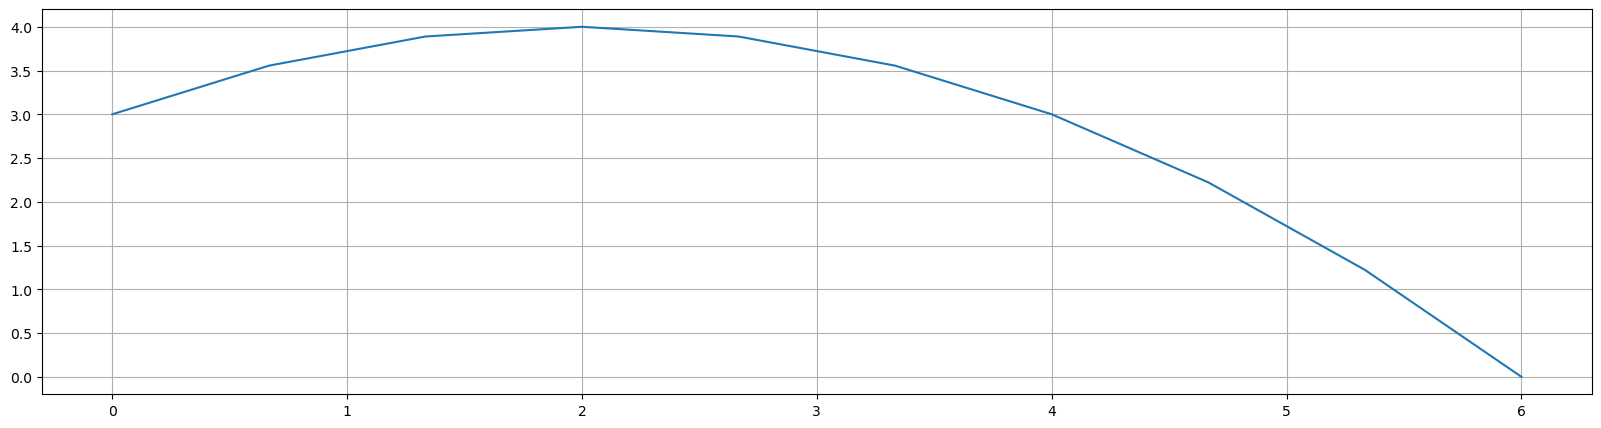

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.grid()
plt.show()

## Uso di un Pacchetto

**Includiamo il codice nel paccheto [base.arc](http://127.0.0.1:8888/edit/base/arc.py)**

* Una funzione `base.arc.fit_curve` per ottenere i coefficienti
* Una funzione  `base.arc.draw_curve` per disegnare la curva

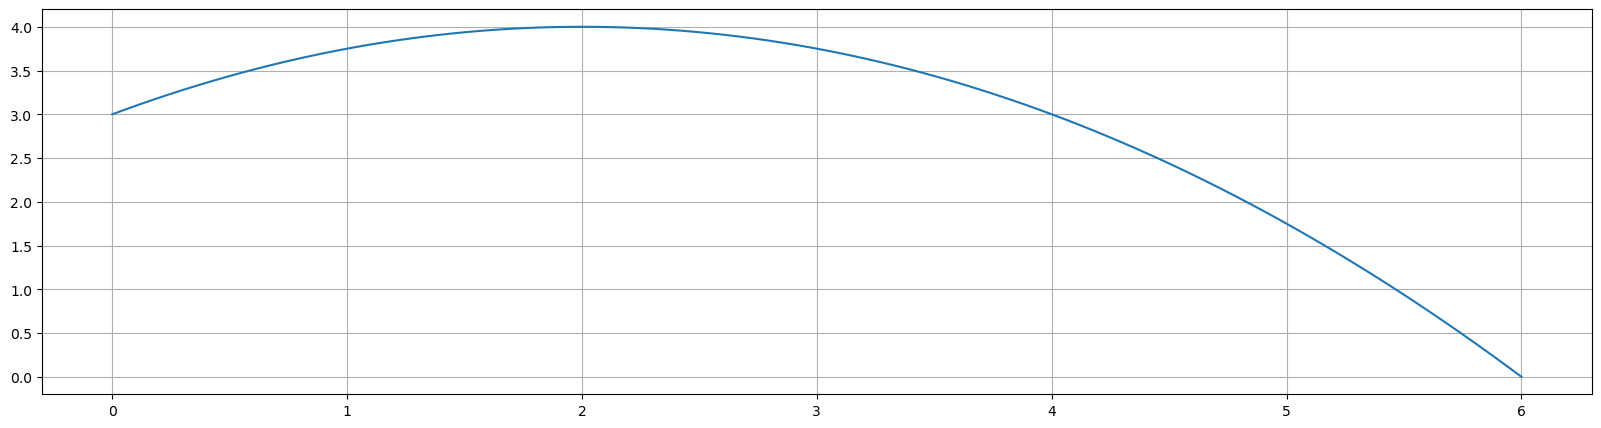

In [8]:
%load_ext autoreload
%autoreload 2
from base import arc
x0, x1, x2 = 0, 2, 6
y0, y2 = 3, 0
alpha_2, alpha_1, alpha_0 = arc.fit_curve(x0, x1, x2, y0, y2)
arc.draw_curve(alpha_2, alpha_1, alpha_0, x0, x2)